**Submission Dicoding**

Ita Sulistiani / itasulis16@gmail.com

username : haru.haruru_

In [ ]:
# import library
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
# import dataset

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-07 10:21:44--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  3.25MB/s    in 75s     

2021-07-07 10:23:01 (4.11 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# ekstraksi dataset

import zipfile, os

local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# membagi dataset menjadi train set dan validation set

from sklearn.model_selection import train_test_split

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
sci_dir = os.path.join(base_dir, 'scissors')

In [ ]:
rock_train = os.path.join(train_dir, 'rock')
rock_val = os.path.join(val_dir, 'rock')

paper_train = os.path.join(train_dir, 'paper')
paper_val = os.path.join(val_dir, 'paper')

sci_train = os.path.join(train_dir, 'scissors')
sci_val = os.path.join(val_dir, 'scissors')

In [ ]:
# pembuatan direktori
directories = [train_dir, val_dir,
               rock_train, rock_val,
               paper_train, paper_val,
               sci_train, sci_val]

for i in directories:
  os.mkdir(i)

In [ ]:
# split dataset train dan validation menjadi 60-40

train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.4)

In [ ]:
# copy file ke direktori

import shutil

for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(rock_train, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, file), os.path.join(paper_train, file))
for file in train_sci_dir:
  shutil.copy(os.path.join(sci_dir, file), os.path.join(sci_train, file))

for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(rock_val, file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir, file), os.path.join(paper_val, file))
for file in val_sci_dir:
  shutil.copy(os.path.join(sci_dir, file), os.path.join(sci_val, file))

In [ ]:
# augmentasi gambar

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 0.2, 
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 0.2,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [ ]:
# membangun image generator

train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data latih
    target_size = (150, 150), # ubah resolusi gambar menjadi 150x150 px
    batch_size = 4, 
    # karena merupakan masalah klasifikasi banyak kelas, gunakan class_mode = 'categorical'
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir, # direktori data validasi
    target_size = (150, 150),
    batch_size = 4, 
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
# membangun model sequential

my_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

my_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
# metode callback function untuk stop training jika akurasi telah di atas 98%

class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.98):
      self.model.stop_training = True

stop_training = Callback()

In [ ]:
# mengkompilasi model menggunakan optimizer 'adam' dan loss function 'categorical_crossentropy'

my_model.compile(loss = 'categorical_crossentropy',
                 optimizer = tf.optimizers.Adam(),
                 metrics = ['accuracy'])

In [ ]:
# training model

training_history = my_model.fit(
    train_generator,
    steps_per_epoch = 32, # banyak batch yang dieksekusi pada tiap epoch
    epochs = 100, # lakukan epoch lanjutan jika akurasi model belum optimal
    validation_data = validation_generator, # tampilkan akurasi pengujian data validasi
    validation_steps = 5, # jumlah batch yang dieksekusi pada setiap epoch
    verbose = 2,
    callbacks = [stop_training]
)

Epoch 1/100
32/32 - 5s - loss: 1.1344 - accuracy: 0.3359 - val_loss: 1.0973 - val_accuracy: 0.4000
Epoch 2/100
32/32 - 4s - loss: 1.1000 - accuracy: 0.3203 - val_loss: 1.0899 - val_accuracy: 0.6000
Epoch 3/100
32/32 - 4s - loss: 1.0937 - accuracy: 0.4141 - val_loss: 1.0976 - val_accuracy: 0.3000
Epoch 4/100
32/32 - 4s - loss: 1.0505 - accuracy: 0.5391 - val_loss: 0.9887 - val_accuracy: 0.6500
Epoch 5/100
32/32 - 4s - loss: 0.9189 - accuracy: 0.5625 - val_loss: 0.8541 - val_accuracy: 0.6500
Epoch 6/100
32/32 - 4s - loss: 0.6522 - accuracy: 0.8047 - val_loss: 0.3608 - val_accuracy: 0.9000
Epoch 7/100
32/32 - 4s - loss: 0.4552 - accuracy: 0.7969 - val_loss: 0.3658 - val_accuracy: 0.9000
Epoch 8/100
32/32 - 4s - loss: 0.4136 - accuracy: 0.8672 - val_loss: 0.1371 - val_accuracy: 0.9500
Epoch 9/100
32/32 - 4s - loss: 0.1711 - accuracy: 0.9297 - val_loss: 0.0316 - val_accuracy: 1.0000
Epoch 10/100
32/32 - 4s - loss: 0.4512 - accuracy: 0.8594 - val_loss: 0.1271 - val_accuracy: 0.9500
Epoch 11/

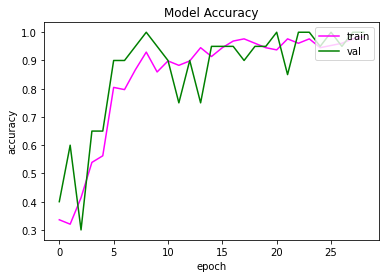

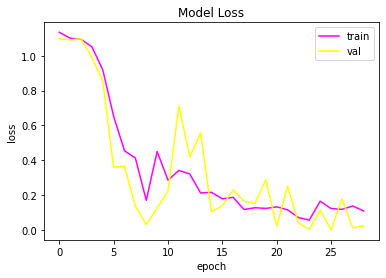

In [ ]:
# visualisasi training model

import matplotlib.pyplot as plt

accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']

loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

plt.plot(accuracy, color = 'magenta')
plt.plot(val_accuracy, color = 'green')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper right')
plt.show()

plt.plot(loss, color = 'magenta')
plt.plot(val_loss, color = 'yellow')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Saving 1624762036788.jpg to 1624762036788 (1).jpg
Scissors


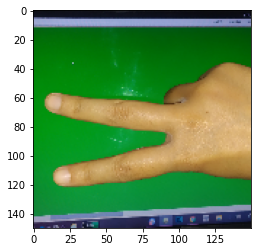

In [ ]:
# melakukan prediksi interaktif

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size =(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = my_model.predict(images, batch_size = 25)

  if classes[0,0] != 0:
    print('Paper')
  elif classes[0,1] != 0:
    print('Rock')
  else:
    print('Scissors')

